In [71]:
import pandas as pd
import numpy as np

In [5]:
import os
print(os.getcwd())

C:\Users\LENOVO\PROJECTS


In [19]:
df_ppl = pd.read_csv("ECOMM-DATA-PEOPLE1.csv")
df_ord = pd.read_csv("ECOMM-DATA-ORDERS1.csv")
df_rec = pd.read_csv("ECOMM-DATA-Records1.csv")

In [17]:
"""
Find Patterns, best selling items, and revenue indicators to help business decision making process
In order to successfully convey your findings, you will compute revenue measures like 
1. total Sales
2. analyse sales trend over time,
3. Determine best selling products and build visualizations
"""

In [33]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [107]:
"""
Now, as we see above, we learn that every column in the order dataframe has complete values. 
But only postal codes are missing for all regions except US
As we have all the necessary details like city, state, and country, we wont be needing the postal codes and can ignore them 
Therefore, we will drop them

"""

'\nNow, as we see above, we learn that every column in the order dataframe has complete values. \nBut only postal codes are missing for all regions except US\nAs we have all the necessary details like city, state, and country, we wont be needing the postal codes and can ignore them \nTherefore, we will drop them\n\n'

In [129]:
df_ord['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10472\3435035255.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_ord['Order Date'] = pd.to_datetime(df_ord['Order Date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10472\3435035255.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ord.resample('M', on='Order Date')['Sales'].sum()


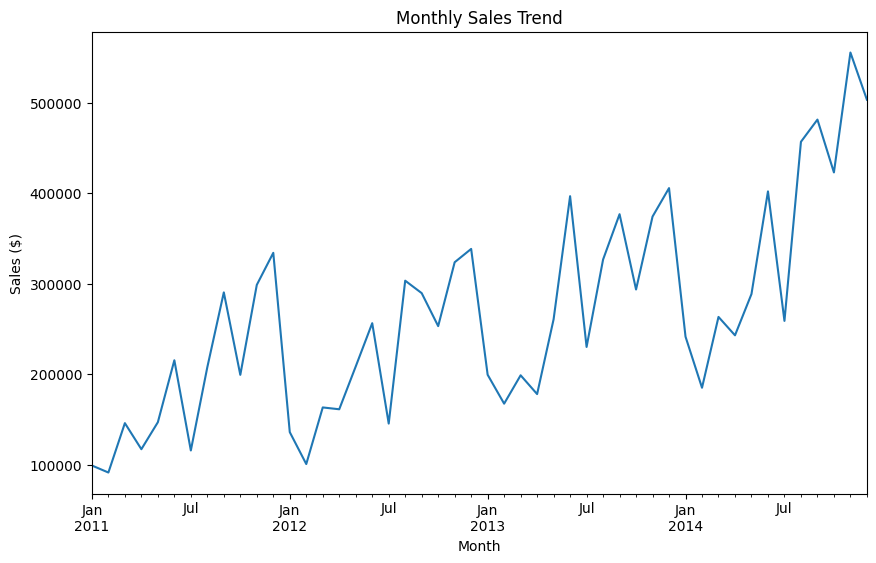

In [249]:
import matplotlib.pyplot as plt

# Convert Order Date to datetime format
df_ord['Order Date'] = pd.to_datetime(df_ord['Order Date'])

# Resample sales by month
monthly_sales = df_ord.resample('M', on='Order Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

In [286]:
best_selling_products = df_ord.groupby('Product ID')['Sales'].sum().sort_values(ascending=False)

print('Best Selling Products:')
print(best_selling_products.head(10))  # Show top 10 best-selling products

Best Selling Products:
Product ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64


In [288]:
best_selling_product_s = df_ord.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

print('Best Selling Products:')
print(best_selling_product_s.head(10))  # Show top 10 best-selling products

Best Selling Products:
Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


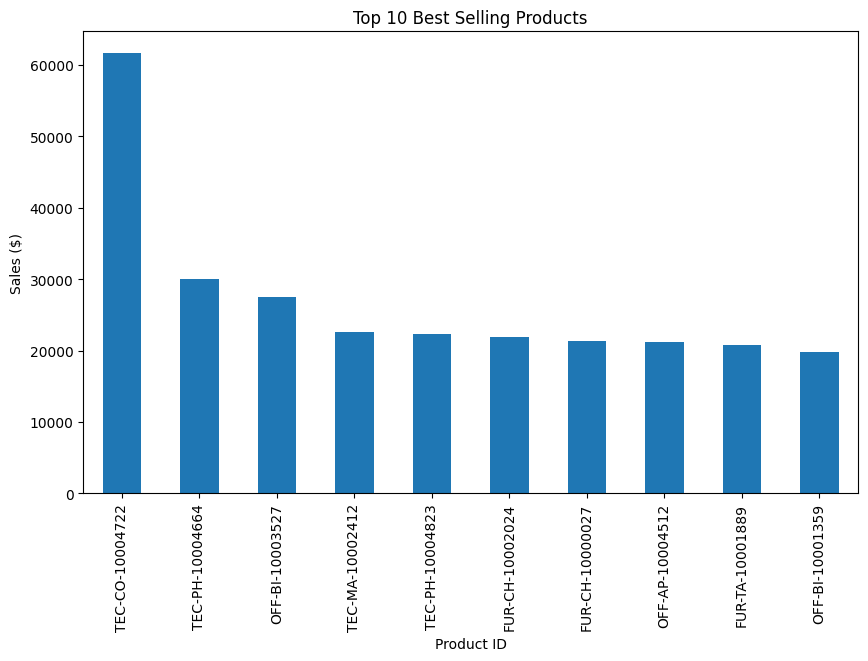

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
best_selling_products.head(10).plot(kind='bar')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Sales ($)')
plt.show()

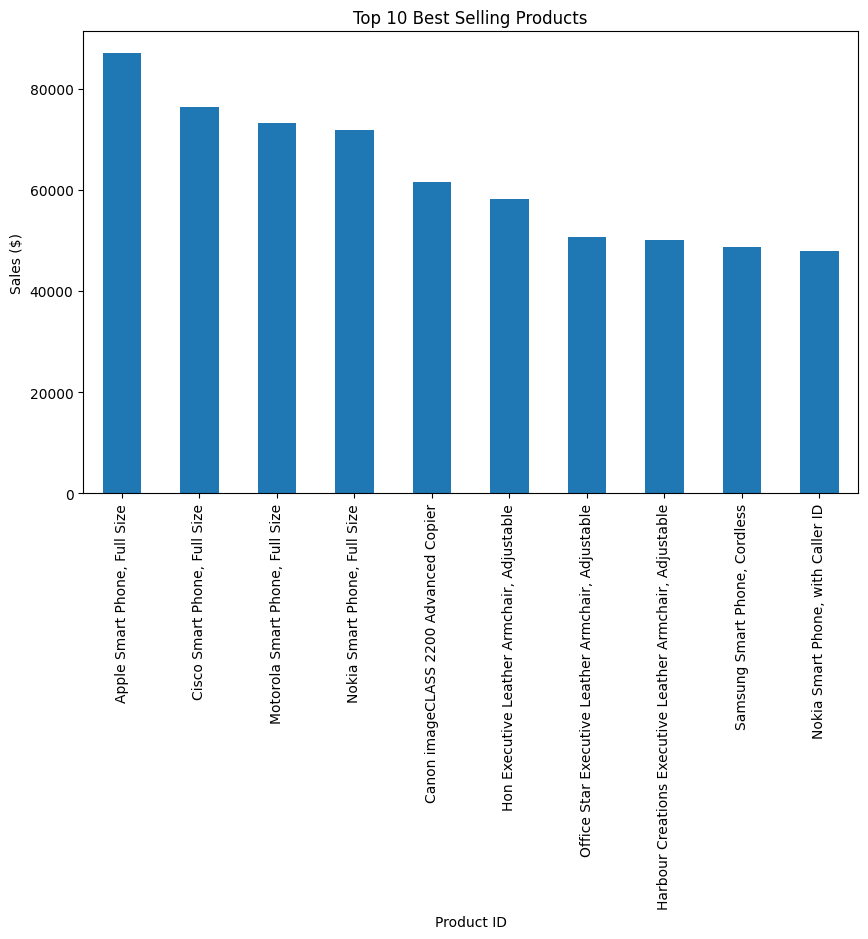

In [292]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
best_selling_product_s.head(10).plot(kind='bar')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Sales ($)')
plt.show()

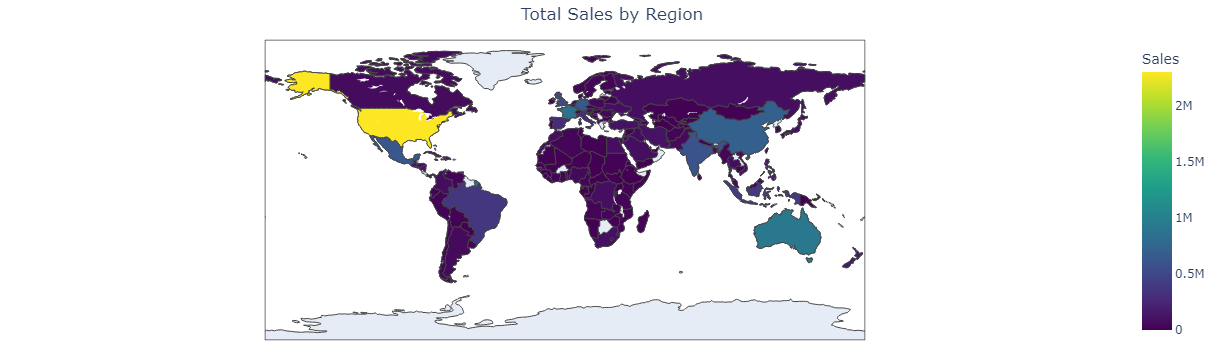

In [307]:
import plotly.express as px

region_sales = df_ord.groupby('Country')['Sales'].sum().reset_index()

# Create a map chart
fig = px.choropleth(region_sales, locations="Country", locationmode="country names", 
                    color="Sales", scope="world",
                    color_continuous_scale="Viridis",
                    hover_name="Country", hover_data=["Sales"])

# Update the layout
fig.update_layout(title="Total Sales by Region", title_x=0.5,
                  margin=dict(l=20, r=20, t=40, b=20))

# Show the chart
fig.show()